In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('congressional_voting_dataset.csv')
df

,handicapped_infants,water_project_cost_sharing,adoption_of_the_budget_resolution,physician_fee_freeze,el_salvador_aid,religious_groups_in_schools,anti_satellite_test_ban,aid_to_nicaraguan_contras,mx_missile,immigration,synfuels_corporation_cutback,education_spending,superfund_right_to_sue,crime,duty_free_exports,export_administration_act_south_africa,political_party
0,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y,republican
1,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?,republican
2,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n,democrat
3,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y,democrat
4,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y,democrat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,n,n,y,y,y,y,n,n,y,y,n,y,y,y,n,y,republican
431,n,n,y,n,n,n,y,y,y,y,n,n,n,n,n,y,democrat
432,n,?,n,y,y,y,n,n,n,n,y,y,y,y,n,y,republican
433,n,n,n,y,y,y,?,?,?,?,n,y,y,y,n,y,republican


## Po namyśle uznaliśmy, że "?" nie należy traktować jako brak danych, ale jako oddzielną klasę.
#### Użyliśmy naturalnego dla nas mapowania zbioru {-1, 0, 1}.
#### Zamieniliśmy też od razu kolumnę political_party -> {republican, democrat} na is_republican -> {1,0}.

In [2]:
d = {'y':1, 'n':-1, '?':0, 'democrat': 0, 'republican':1}
for i in df.columns:
    df[i] = df[i].map(d)
df.rename(columns={'political_party': 'is_republican'})

,handicapped_infants,water_project_cost_sharing,adoption_of_the_budget_resolution,physician_fee_freeze,el_salvador_aid,religious_groups_in_schools,anti_satellite_test_ban,aid_to_nicaraguan_contras,mx_missile,immigration,synfuels_corporation_cutback,education_spending,superfund_right_to_sue,crime,duty_free_exports,export_administration_act_south_africa,is_republican
0,-1,1,-1,1,1,1,-1,-1,-1,1,0,1,1,1,-1,1,1
1,-1,1,-1,1,1,1,-1,-1,-1,-1,-1,1,1,1,-1,0,1
2,0,1,1,0,1,1,-1,-1,-1,-1,1,-1,1,1,-1,-1,0
3,-1,1,1,-1,0,1,-1,-1,-1,-1,1,-1,1,-1,-1,1,0
4,1,1,1,-1,1,1,-1,-1,-1,-1,1,0,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,-1,-1,1,1,1,1,-1,-1,1,1,-1,1,1,1,-1,1,1
431,-1,-1,1,-1,-1,-1,1,1,1,1,-1,-1,-1,-1,-1,1,0
432,-1,0,-1,1,1,1,-1,-1,-1,-1,1,1,1,1,-1,1,1
433,-1,-1,-1,1,1,1,0,0,0,0,-1,1,1,1,-1,1,1


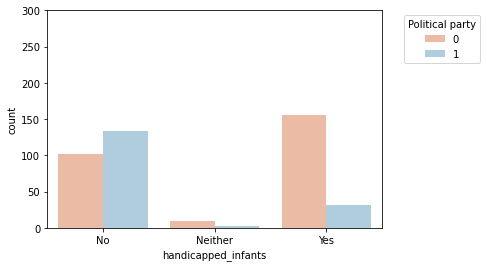

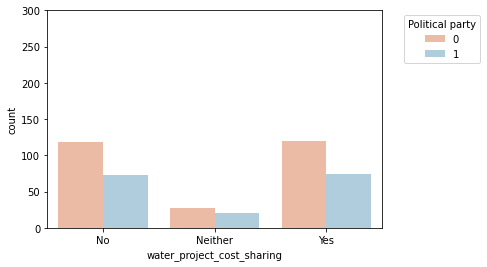

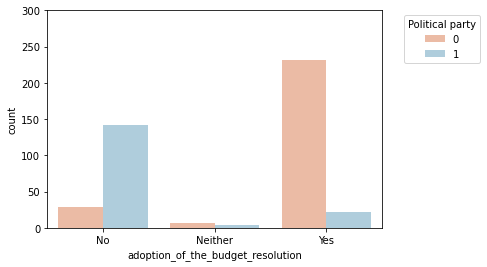

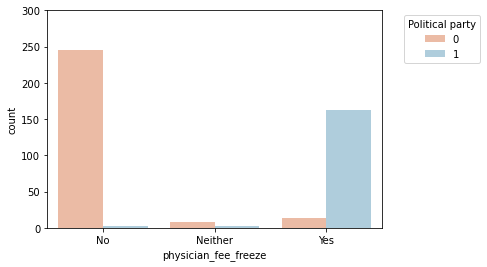

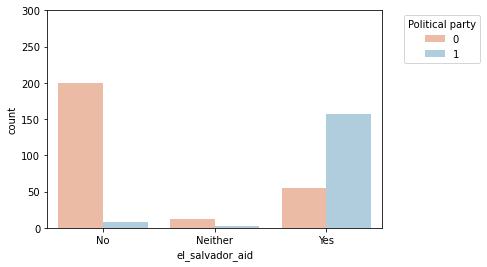

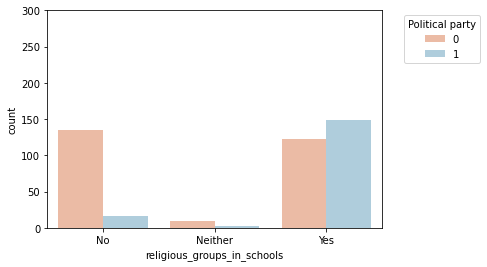

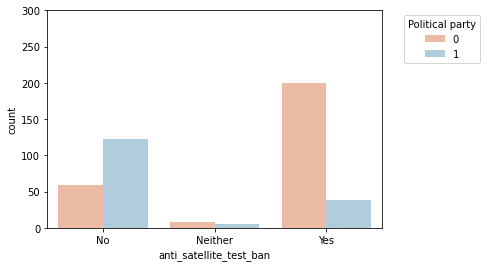

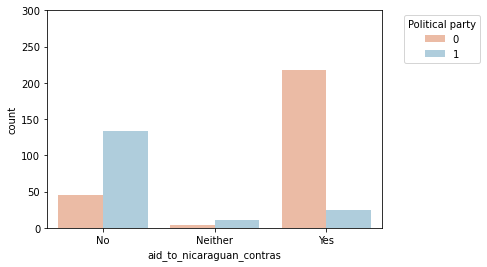

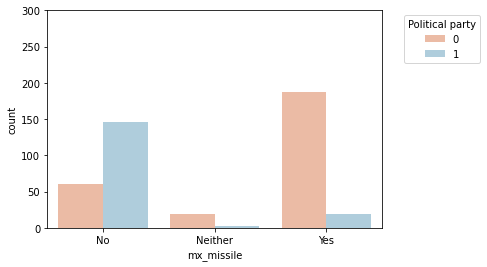

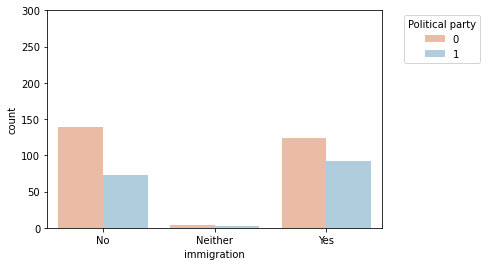

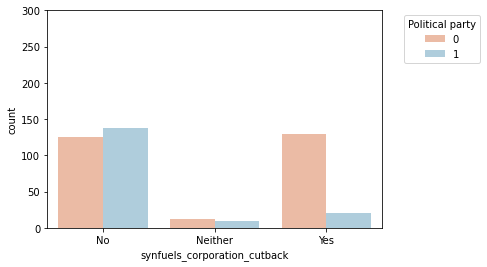

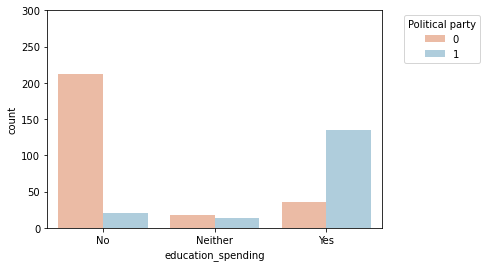

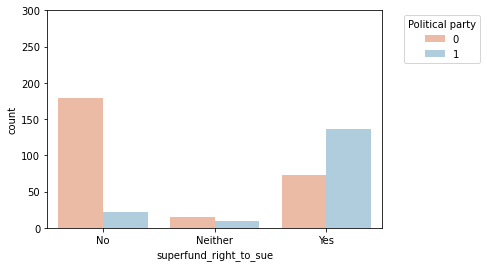

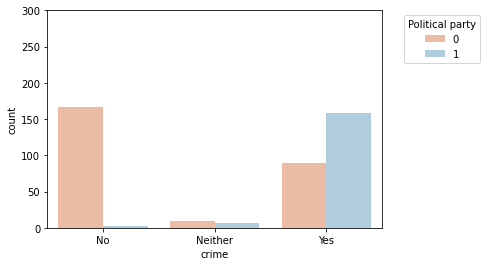

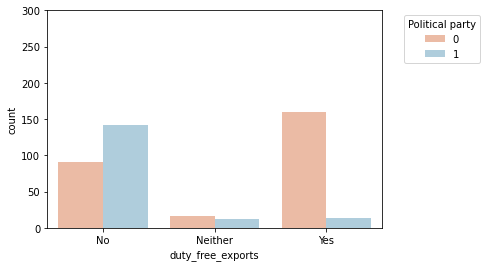

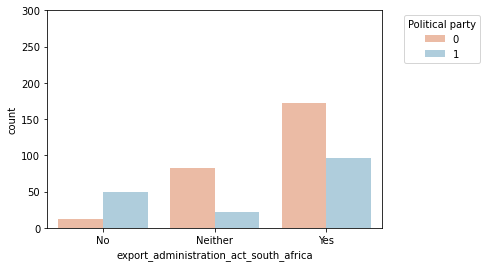

In [3]:
for i in df.columns[:16]:
    plt.figure()
    sns.countplot(x=i, hue='political_party', data=df, palette='RdBu')
    plt.xticks([0,1,2], ['No', 'Neither', 'Yes'])
    plt.legend(title='Political party', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.ylim(0, 300)
    plt.show()

## Modelowanie
Podział na zbiór treningowy i testowy

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df[df.columns[:16]], df['political_party'], test_size=0.3, random_state=42)

Wybranie modeli

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

model1 = DecisionTreeClassifier(random_state=1, max_depth=3)
model2 = KNeighborsClassifier()
model3 = LogisticRegression(random_state=1, max_iter=1000)
models = [model1, model2, model3]

Kroswalidacja

In [6]:
from sklearn.model_selection import cross_val_score
for model in models:
    print()
    print(type(model).__name__, cross_val_score(model, X_train, y_train, scoring='f1', cv = 10))


DecisionTreeClassifier [0.95652174 0.84615385 0.96       0.96296296 0.72727273 0.95652174
 0.92307692 0.95652174 0.95652174 0.88      ]

KNeighborsClassifier [0.91666667 0.92307692 0.96296296 1.         0.81481481 0.91666667
 0.92307692 0.96       1.         0.84615385]

LogisticRegression [0.95652174 0.91666667 1.         1.         0.83333333 0.95652174
 0.88888889 0.96       1.         0.95652174]


In [7]:
for model in models:
    print()
    print(type(model).__name__, cross_val_score(model, X_train, y_train, scoring='roc_auc', cv = 10))


DecisionTreeClassifier [1.         0.94298246 1.         0.96581197 0.92592593 0.94444444
 0.94444444 0.99768519 1.         0.94907407]

KNeighborsClassifier [0.99561404 0.96052632 1.         1.         0.94212963 0.92361111
 0.94444444 0.96527778 1.         0.94675926]

LogisticRegression [1.         0.96491228 1.         1.         0.9537037  1.
 1.         0.99537037 1.         0.99537037]


In [8]:
for model in models:
    model.fit(X_train, y_train)
    print()
    print(type(model).__name__, model.score(X_test, y_test))


DecisionTreeClassifier 0.9465648854961832

KNeighborsClassifier 0.9541984732824428

LogisticRegression 0.9847328244274809


# Modelowanie z brakami danych
Sprawdzamy sytuację gdy nie dopuszczamy niezdecydowanych głosów

In [9]:
df2 = pd.read_csv('congressional_voting_dataset.csv')

In [10]:
d2 = {'y':1, 'n':0, '?':None, 'democrat': 0, 'republican':1}
for i in df2.columns:
    df2[i] = df2[i].map(d2)
df2.rename(columns={'political_party': 'is_republican'})

,handicapped_infants,water_project_cost_sharing,adoption_of_the_budget_resolution,physician_fee_freeze,el_salvador_aid,religious_groups_in_schools,anti_satellite_test_ban,aid_to_nicaraguan_contras,mx_missile,immigration,synfuels_corporation_cutback,education_spending,superfund_right_to_sue,crime,duty_free_exports,export_administration_act_south_africa,is_republican
0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0,1.0
1,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN,1.0
2,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
3,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
431,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
432,0.0,NaN,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
433,0.0,0.0,0.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,0.0,1.0,1.0,1.0,0.0,1.0,1.0


In [11]:
from sklearn.impute import KNNImputer
knni = KNNImputer(n_neighbors=1)
df2 = pd.DataFrame(knni.fit_transform(df2))

In [12]:
df2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
1,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
2,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
3,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
431,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
432,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
433,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0


In [13]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    df2[df2.columns[:16]], df2[16], test_size=0.3, random_state=42)

In [14]:
for model in models:
    print()
    print(type(model).__name__, cross_val_score(model, X_train2, y_train2, scoring='f1', cv = 10))


DecisionTreeClassifier [0.95652174 0.8        1.         0.91666667 0.88       0.95652174
 0.92307692 0.95652174 0.95652174 0.88      ]

KNeighborsClassifier [0.91666667 0.88888889 1.         1.         0.81481481 0.91666667
 0.92307692 0.96       1.         0.88      ]

LogisticRegression [1.         0.96       1.         1.         0.88       0.95652174
 0.92307692 0.96       1.         0.95652174]


In [18]:
for model in models:
    print()
    print(type(model).__name__, cross_val_score(model, X_train2, y_train2, scoring='roc_auc', cv = 10))


DecisionTreeClassifier [1.         0.87719298 1.         1.         0.9375     0.9537037
 0.94444444 0.99768519 1.         0.95138889]

KNeighborsClassifier [0.99342105 0.98684211 1.         1.         0.95601852 0.92361111
 0.93981481 0.96527778 1.         0.94907407]

LogisticRegression [1.         0.99122807 1.         1.         0.97222222 0.99537037
 1.         0.99537037 1.         0.98611111]


In [19]:
for model in models:
    model.fit(X_train2, y_train2)
    print()
    print(type(model).__name__, model.score(X_test2, y_test2))


DecisionTreeClassifier 0.9541984732824428

KNeighborsClassifier 0.9465648854961832

LogisticRegression 0.9847328244274809
